In [ ]:
import pandas as pd
import numpy as np
import math
import tensorflow
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
from tensorflow import keras
from keras import optimizers

In [ ]:
tensorflow.random.set_seed(0)

In [ ]:
(X, y), (X_test, y_test) =mnist.load_data()

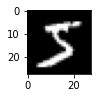

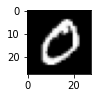

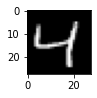

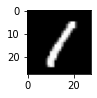

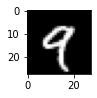

In [ ]:
#plotting
from matplotlib import pyplot
for i in range(5):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
#shape of dataset
print('X_train: ' + str(X.shape))
print('Y_train: ' + str(y.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Normalizing

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X, X_test = X.astype('float32')/255.0, X_test.astype('float32')/255.0

One Hot Encoding the output

In [ ]:
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y.shape)
print("One value of y_train:", y[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Model 1:-Lth layer will have more filters than the (L-1)th layer.**

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 6, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters= 8, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 10, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 12, kernel_size=3, padding = "Same", activation="relu"))
model.add(Conv2D(filters= 16, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 24, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 28, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 34, kernel_size=3, padding = "Same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(filters= 40, kernel_size=3,activation="relu"))
model.add(Conv2D(filters= 64, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [ ]:
mod = model
mod.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 8)         440       
                                                                 
 conv2d_32 (Conv2D)          (None, 22, 22, 10)        730       
                                                                 
 conv2d_33 (Conv2D)          (None, 22, 22, 12)        1092      
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 20, 16)        1744      
                                                                 
 conv2d_35 (Conv2D)          (None, 18, 18, 24)        3480      
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 28)       

In [ ]:
lr=0.00001
lr_rate=[0.0005,0.0001, 0.001, 0.00001, 0.000001]
batch_sizes = [10,50,100,200,500,1000]
Learning_rate = []
Loss = []
batch_size = []
Accuracy = []
opt = []
name=["SGD","Adam","RMSprop"]
model_list = [tensorflow.keras.optimizers.SGD(learning_rate= lr),tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.8), tensorflow.keras.optimizers.RMSprop(learning_rate= lr)]
for optimization_method,k in zip(model_list,name):
    for i in range(3):
      lr = lr_rate[np.random.randint(0,len(lr_rate)-1)]
      batch = np.random.randint(0,len(batch_sizes)-1)
      model = model
      print('The type of optimizer we are using is :-')
      print((k))
      model.compile(loss='categorical_crossentropy',optimizer = optimization_method,metrics = ['accuracy'])
      model.fit(X,y, epochs= 1,batch_size = batch_sizes[batch])
      loss,accuracy = model.evaluate(X_test,y_test)

      Learning_rate.append(lr)
      Loss.append(loss)
      Accuracy.append(accuracy)
      batch_size.append(batch_sizes[batch])

      print('Accuracy on the Validation Data is {0} and the loss is {1}'.format(accuracy,loss))

The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1819
Accuracy on the Validation Data is 0.1818999946117401 and the loss is 2.3019332885742188
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1510
Accuracy on the Validation Data is 0.1509999930858612 and the loss is 2.3015832901000977
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1476
Accuracy on the Validation Data is 0.147599995136261 and the loss is 2.3015520572662354
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 4ms/step - loss: 0.3774 - accuracy: 0.8872
Accuracy on the Validation Data is 0.8871999979019165 and the loss is 0.3773624897003174
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 3ms/step - loss:

In [ ]:
# Visualizng the Results
df = pd.DataFrame(Learning_rate,columns=['Learning Rate'])
df['Optimizers'] = ["SGD","SGD","SGD","Adam","Adam","Adam","RMSprop","RMSprop","RMSprop"]
df['Batch_size'] = batch_size
df['Loss'] = Loss
df['Accuracy'] = Accuracy

In [ ]:
df

,Learning Rate,Optimizers,Batch_size,Loss,Accuracy
0,0.00100,SGD,200,2.301933,0.1819
1,0.00050,SGD,10,2.301583,0.1510
2,0.00010,SGD,100,2.301552,0.1476
3,0.00100,Adam,10,0.377362,0.8872
4,0.00001,Adam,500,0.353859,0.8950
5,0.00050,Adam,200,0.344005,0.8989
6,0.00001,RMSprop,50,0.314848,0.9044
7,0.00001,RMSprop,100,0.288190,0.9131
8,0.00050,RMSprop,100,0.271240,0.9186


For the model 1 ( the Lth layer will have more filters than the (L-1)th layer) what I did was to try to make 3 model with different optimizers ( SGD, Adam, RMSprop). I tried to give a randomly learning rate and batch size and then tried to check what each optimizer performed with that values. Here as we can see that SGD has almost no change in accuracy even with the batch and learning rate change. While the Adam optimizer performs better with batch size of 200 and learning rate of 0.0005. While the optimizer RMSprop can have a accuracy of 0.918 that is the best with the learning rate of 0.0005 and batch size of 100.

In [ ]:
#Retraining on the most optimal parameters
model = model
RMSprop = tensorflow.keras.optimizers.RMSprop(learning_rate= 0.0005)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= RMSprop)

model.fit(X,y, epochs= 10,batch_size = 1100)
loss,accuracy = model.evaluate(X_test,y_test)

print("Accuracy of model is : {0}".format(accuracy))

Epoch 1/10
55/55 [==============================] - 6s 71ms/step - loss: 0.1379 - accuracy: 0.9612
Epoch 2/10
55/55 [==============================] - 3s 57ms/step - loss: 0.0916 - accuracy: 0.9721
Epoch 3/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0757 - accuracy: 0.9767
Epoch 4/10
55/55 [==============================] - 3s 57ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 5/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 6/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 7/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0414 - accuracy: 0.9869
Epoch 8/10
55/55 [==============================] - 3s 58ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 9/10
55/55 [==============================] - 3s 59ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0519 - accuracy: 0.9829
Accuracy

 # **Model 2:- the Lth layer will have less filters than the (L-1)th layer.**

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size= 3, activation="relu",  input_shape=(28, 28, 1)))
model.add(Conv2D(filters= 40, kernel_size= 3, activation="relu"))
# model.add(MaxPool2D())
model.add(Conv2D(filters= 34, kernel_size= 3 , activation="relu"))
model.add(Conv2D(filters= 28, kernel_size= 3 ,activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(filters= 24, kernel_size= 3, activation="relu"))
model.add(Conv2D(filters= 18, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 16, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 14, kernel_size=3, padding = "Same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(filters= 6, kernel_size=1,activation="relu"))
model.add(Conv2D(filters= 4, kernel_size=1, activation="relu"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

mod = model
mod.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 40)        23080     
                                                                 
 conv2d_42 (Conv2D)          (None, 22, 22, 34)        12274     
                                                                 
 conv2d_43 (Conv2D)          (None, 20, 20, 28)        8596      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 28)       0         
 2D)                                                             
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 24)          6072      
                                                      

In [ ]:
lr=0.00001
lr_rate=[0.0005,0.0001, 0.001, 0.00001, 0.000001]
batch_sizes = [10,50,100,200,500,1000]
Learning_rate = []
Loss = []
batch_size = []
Accuracy = []
opt = []
name=["SGD","Adam","RMSprop"]
model_list = [tensorflow.keras.optimizers.SGD(learning_rate= lr),tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.8), tensorflow.keras.optimizers.RMSprop(learning_rate= lr)]
for optimization_method,k in zip(model_list,name):
    for i in range(3):
      lr = lr_rate[np.random.randint(0,len(lr_rate)-1)]
      batch = np.random.randint(0,len(batch_sizes)-1)
      model = model
      print('The type of optimizer we are using is :-')
      print((k))
      model.compile(loss='categorical_crossentropy',optimizer = optimization_method,metrics = ['accuracy'])
      model.fit(X,y, epochs= 1,batch_size = batch_sizes[batch])
      loss,accuracy = model.evaluate(X_test,y_test)

      Learning_rate.append(lr)
      Loss.append(loss)
      Accuracy.append(accuracy)
      batch_size.append(batch_sizes[batch])

      print('Accuracy on the Validation Data is {0} and the loss is {1}'.format(accuracy,loss))

The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1230
Accuracy on the Validation Data is 0.12300000339746475 and the loss is 2.302565813064575
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1296
Accuracy on the Validation Data is 0.12960000336170197 and the loss is 2.3025505542755127
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 52s 4ms/step - loss: 2.3025 - accuracy: 0.1307
Accuracy on the Validation Data is 0.1307000070810318 and the loss is 2.3025479316711426
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 4ms/step - loss: 2.2942 - accuracy: 0.1959
Accuracy on the Validation Data is 0.19589999318122864 and the loss is 2.2942113876342773
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 3ms/step - l

In [ ]:
# Visualizng the Results
df = pd.DataFrame(Learning_rate,columns=['Learning Rate'])
df['Optimizers'] = ["SGD","SGD","SGD","Adam","Adam","Adam","RMSprop","RMSprop","RMSprop"]
df['Batch_size'] = batch_size
df['Loss'] = Loss
df['Accuracy'] = Accuracy

In [ ]:
df

,Learning Rate,Optimizers,Batch_size,Loss,Accuracy
0,0.00100,SGD,50,2.302566,0.1230
1,0.00100,SGD,100,2.302551,0.1296
2,0.00010,SGD,500,2.302548,0.1307
3,0.00010,Adam,200,2.294211,0.1959
4,0.00100,Adam,500,2.258393,0.2060
5,0.00001,Adam,200,1.904566,0.2844
6,0.00050,RMSprop,200,1.764838,0.3088
7,0.00010,RMSprop,50,1.422587,0.5177
8,0.00100,RMSprop,500,1.359720,0.5458


For the model 2 ( the Lth layer will have more filters than the (L-1)th layer) what I did was to try to make 3 model with different optimizers ( SGD, Adam, RMSprop). I tried to give a randomly learning rate and batch size and then tried to check what each optimizer performed with that values. Here as we can see that SGD has almost no change in accuracy even with the batch and learning rate change. While the Adam optimizer performs better with batch size of 200 and learning rate of 0.000001.  While the optimizer RMSprop can have a accuracy of 0.5458 that is the best with the learning rate of 0.001 and batch size of 500.

In [ ]:
#Retraining on the most optimal parameters
model = model
RMSprop = tensorflow.keras.optimizers.RMSprop(learning_rate= 0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= RMSprop)

model.fit(X,y, epochs= 10,batch_size = 500)
loss,accuracy = model.evaluate(X_test,y_test)

print("Accuracy of model is : {0}".format(accuracy))

Epoch 1/10
120/120 [==============================] - 6s 41ms/step - loss: 1.8485 - accuracy: 0.3536
Epoch 2/10
120/120 [==============================] - 5s 41ms/step - loss: 0.8974 - accuracy: 0.7382
Epoch 3/10
120/120 [==============================] - 5s 42ms/step - loss: 0.4401 - accuracy: 0.8747
Epoch 4/10
120/120 [==============================] - 5s 41ms/step - loss: 0.2665 - accuracy: 0.9230
Epoch 5/10
120/120 [==============================] - 5s 41ms/step - loss: 0.1834 - accuracy: 0.9465
Epoch 6/10
120/120 [==============================] - 5s 41ms/step - loss: 0.1324 - accuracy: 0.9610
Epoch 7/10
120/120 [==============================] - 5s 41ms/step - loss: 0.1071 - accuracy: 0.9680
Epoch 8/10
120/120 [==============================] - 5s 41ms/step - loss: 0.0860 - accuracy: 0.9752
Epoch 9/10
120/120 [==============================] - 5s 41ms/step - loss: 0.0734 - accuracy: 0.9783
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0551 - accurac

The Accuracy of the model is 0.9833

# **Model 3:- An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.**

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 4, kernel_size= 5, activation="relu",  input_shape=(28, 28, 1)))
model.add(Conv2D(filters= 6, kernel_size= 5, activation="relu"))
# model.add(MaxPool2D())
model.add(Conv2D(filters= 12, kernel_size= 3 , activation="relu"))
model.add(Conv2D(filters= 24, kernel_size= 3 ,activation="relu"))
# model.add(MaxPool2D())
model.add(Conv2D(filters= 40, kernel_size= 3, activation="relu"))
model.add(Conv2D(filters= 56, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 40, kernel_size=3, activation="relu"))
model.add(Conv2D(filters= 24, kernel_size=3,activation="relu"))
# model.add(MaxPool2D())
model.add(Conv2D(filters= 12, kernel_size=3,activation="relu"))
model.add(Conv2D(filters= 6, kernel_size=5, activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
mod = model
mod.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 24, 24, 4)         104       
                                                                 
 conv2d_51 (Conv2D)          (None, 20, 20, 6)         606       
                                                                 
 conv2d_52 (Conv2D)          (None, 18, 18, 12)        660       
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 24)        2616      
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 40)        8680      
                                                                 
 conv2d_55 (Conv2D)          (None, 12, 12, 56)        20216     
                                                                 
 conv2d_56 (Conv2D)          (None, 10, 10, 40)       

In [ ]:
lr=0.00001
lr_rate=[0.0005,0.0001, 0.001, 0.00001, 0.000001]
batch_sizes = [10,50,100,200,500,1000]
Learning_rate = []
Loss = []
batch_size = []
Accuracy = []
opt = []
name=["SGD","Adam","RMSprop"]
model_list = [tensorflow.keras.optimizers.SGD(learning_rate= lr),tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.8), tensorflow.keras.optimizers.RMSprop(learning_rate= lr)]
for optimization_method,k in zip(model_list,name):
    for i in range(3):
      lr = lr_rate[np.random.randint(0,len(lr_rate)-1)]
      batch = np.random.randint(0,len(batch_sizes)-1)
      model = model
      print('The type of optimizer we are using is :-')
      print((k))
      model.compile(loss='categorical_crossentropy',optimizer = optimization_method,metrics = ['accuracy'])
      model.fit(X,y, epochs= 1,batch_size = batch_sizes[batch])
      loss,accuracy = model.evaluate(X_test,y_test)

      Learning_rate.append(lr)
      Loss.append(loss)
      Accuracy.append(accuracy)
      batch_size.append(batch_sizes[batch])

      print('Accuracy on the Validation Data is {0} and the loss is {1}'.format(accuracy,loss))

The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 4ms/step - loss: 2.3025 - accuracy: 0.1156
Accuracy on the Validation Data is 0.11559999734163284 and the loss is 2.3024871349334717
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1142
Accuracy on the Validation Data is 0.11420000344514847 and the loss is 2.302457332611084
The type of optimizer we are using is :-
SGD
313/313 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1133
Accuracy on the Validation Data is 0.11330000311136246 and the loss is 2.3024539947509766
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 4ms/step - loss: 1.8830 - accuracy: 0.2946
Accuracy on the Validation Data is 0.2946000099182129 and the loss is 1.8829541206359863
The type of optimizer we are using is :-
Adam
313/313 [==============================] - 1s 4ms/step - lo

In [ ]:
# Visualizng the Results
df = pd.DataFrame(Learning_rate,columns=['Learning Rate'])
df['Optimizers'] = ["SGD","SGD","SGD","Adam","Adam","Adam","RMSprop","RMSprop","RMSprop"]
df['Batch_size'] = batch_size
df['Loss'] = Loss
df['Accuracy'] = Accuracy

In [ ]:
df

,Learning Rate,Optimizers,Batch_size,Loss,Accuracy
0,0.00001,SGD,200,2.302487,0.1156
1,0.00001,SGD,50,2.302457,0.1142
2,0.00050,SGD,500,2.302454,0.1133
3,0.00001,Adam,10,1.882954,0.2946
4,0.00100,Adam,10,1.552042,0.4675
5,0.00050,Adam,100,1.514699,0.4828
6,0.00100,RMSprop,500,1.488777,0.4927
7,0.00050,RMSprop,200,1.445320,0.5108
8,0.00050,RMSprop,200,1.402575,0.5320


For the model 2 ( the Lth layer will have more filters than the (L-1)th layer) what I did was to try to make 3 model with different optimizers ( SGD, Adam, RMSprop). I tried to give a randomly learning rate and batch size and then tried to check what each optimizer performed with that values. Here as we can see that SGD has almost no change in accuracy even with the batch and learning rate change. While the Adam optimizer performs better with batch size of 100 and learning rate of 0.0005.  While the optimizer RMSprop can have a accuracy of 0.532 that is the best with the learning rate of 0.0005 and batch size of 200.

In [ ]:
#Retraining on the most optimal parameters
model = model
RMSprop = tensorflow.keras.optimizers.RMSprop(learning_rate= 0.0005)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= RMSprop)

model.fit(X,y, epochs= 10,batch_size = 200)
loss,accuracy = model.evaluate(X_test,y_test)

print("Accuracy of model is : {0}".format(accuracy))

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 0.1609 - accuracy: 0.9543
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1371 - accuracy: 0.9598
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1217 - accuracy: 0.9645
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1096 - accuracy: 0.9681
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1003 - accuracy: 0.9702
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0911 - accuracy: 0.9737
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0826 - accuracy: 0.9753
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0765 - accuracy: 0.9771
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0707 - accuracy: 0.9792
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0794 - accurac

The Accuracy of the model is 0.976